In [1]:
import os
import glob
import numpy as np
import pandas as pd
import nltk
pd.set_option('display.max_colwidth', 200) # set max number of characters can see in pd dataframe

In [2]:
all_news = pd.read_pickle("./data/newspickle.pkl")
all_news.head()

,long_date_format,headline,text,url
0,"Mon Nov 13, 2006 3:16am EST","Hitachi, GE boost alliance in nuclear power business","TOKYO (Reuters) - Hitachi Ltd. ( 6501.T ) said on Monday it has agreed with General Electric Co. ( GE.N ) to expand their global alliance in the nuclear power business, aiming to strengthen thei...",http://www.reuters.com/article/2006/11/13/us-energy-hitachi-ge-idUSTKB00256820061113
1,"Mon Nov 13, 2006 8:45am EST","Volvo to cut 1,000 staff at Virginia plant","STOCKHOLM (Reuters) - Truck maker Volvo said on Monday it would cut about 1,000 staff at its Dublin, Virginia plant in the United States due to an expected decline in output. After years of stro...",http://www.reuters.com/article/2006/11/13/us-autos-volvo-us-idUSSAT00355920061113
2,"Mon Nov 13, 2006 3:15am EST",European banks hiding full pension obligations,"ZURICH, Nov 13 (Reuter) - West European banks are failing to disclose unfunded staff pension obligations running to billions of dollars, in contrast to U.S. banks which are required to show the f...",http://www.reuters.com/article/2006/11/13/us-financial-pensions-idUSL1083562820061113
3,"Mon Nov 13, 2006 7:13am EST","Hitachi, GE to form joint nuclear power ventures",TOKYO (Reuters) - Japan's Hitachi Ltd. and U.S. group General Electric Co. said on Monday they would set up joint ventures in Japan and the United States to combine their nuclear power operation...,http://www.reuters.com/article/2006/11/13/us-energy-hitachi-ge-nuclear-idUST3593020061113
4,"Mon Nov 13, 2006 7:29am EST",Eddie Bauer agrees to be bought for $286 million,(Reuters) - Eddie Bauer Holdings Inc. EBHI.O said and it has agreed to be acquired by a company owned by affiliates of Sun Capital Partners Inc. and Golden Gate Capital for about $286 million and...,http://www.reuters.com/article/2006/11/13/us-retail-eddiebauer-suncapitalpartners-idUSWNAS309120061113


In [3]:
all_news_labeled = pd.read_pickle("./data/labeled_news.pkl")
print("News loaded")

News loaded


## Exploring the data set

In [4]:
# What is the shape of this datataset
print("Input data has {} rows and {} columns".format(len(all_news_labeled), len(all_news_labeled.columns)))

Input data has 106494 rows and 9 columns


In [5]:
# How many revies are negative and positive?

print("Out of {} rows, {} are negative, {} are neutral, {} are positive".format(len(all_news_labeled), 
                                                       len(all_news_labeled[all_news_labeled['label']==-1]), 
                                                       len(all_news_labeled[all_news_labeled['label']==0]),
                                                       len(all_news_labeled[all_news_labeled['label']==1])))

Out of 106494 rows, 32597 are negative, 6642 are neutral, 67255 are positive


In [6]:
# Is there any missing data?
print("Number of null in label: {}".format(all_news_labeled['label'].isnull().sum()))
print("Number of null in text: {}".format(all_news_labeled['text'].isnull().sum()))

Number of null in label: 0
Number of null in text: 0


In [7]:
size_of_samp = 10
rand_samples_to_check = np.random.randint(len(all_news_labeled), size=size_of_samp)

for samp_num in rand_samples_to_check:
    print ('============================================================')
    print (all_news_labeled['text'][samp_num], '||', all_news_labeled['label'][samp_num])
    print ('============================================================')

 DETROIT  (Reuters) - General Motors Corp will offer buyouts or early retirements to all 74,000 U.S. hourly workers represented by the United Auto Workers in a sweeping deal with the union intended to clear the way for GM to hire lower-cost replacements. The cost-saving agreement follows a program launched in January for about 5,200 workers at GM's service parts and operations facilities across the United States and five other facilities, and comes with better terms than GM offered to UAW workers in 2006. GM representatives said it would take weeks to introduce the complicated buyout offers to its workers, who will have 45 days to consider them and then seven days to reconsider. It expects to complete the voluntary program by July 1. The benefits of the workforce transformation plan will start to hit GM "later this year and into '09," Chief Financial Officer Fritz Henderson told reporters on Tuesday. The costs of the buyout program will begin to accrue to GM in the first half of 2008 a

In [8]:
positives = all_news_labeled.loc[all_news_labeled['label']==1]
print(len(positives))

67255


In [9]:
N_SAMPLES = 5000

In [10]:
positives_sample = positives.sample(n=N_SAMPLES)
print(len(positives_sample))
positives_sample.head()

5000


,long_date_format,headline,text,url,neg,neu,pos,compound,label
74639,"Thu Jan 17, 2013 4:58pm EST","Housing, labor data provide upbeat signs on economy","WASHINGTON (Reuters) - The number of Americans filing new claims for unemployment aid hit a five-year low last week and residential construction surged in December, the latest signs that the U.S...",http://www.reuters.com/article/2013/01/17/us-usa-economy-idUSBRE90E0KL20130117,0.059,0.846,0.095,0.9847,1
98493,"Sat Feb 9, 2008 5:33am EST",Japan may submit BOJ governor plan by Feb 15-paper,"TOKYO (Reuters) - Japan may propose a plan to parliament as soon as February 15 to promote Bank of Japan Deputy Governor Toshiro Muto as the head of the bank to succeed Toshihiko Fukui, whose te...",http://www.reuters.com/article/2008/02/09/us-japan-economy-boj-idUSL0958932320080209,0.011,0.879,0.110,0.9861,1
71178,"Fri Jan 29, 2010 5:32pm EST",MGM studio wins debt leeway as auction progresses,"LOS ANGELES (Reuters) - Lenders for Hollywood studio Metro-Goldwyn-Mayer MGMYR.UL agreed to extend a debt forbearance to March 31, which gives the studio more time to find a buyer. The extension...",http://www.reuters.com/article/2010/01/29/us-mgm-debt-idUSTRE60S6KQ20100129,0.026,0.915,0.059,0.7845,1
60145,"Tue Jun 23, 2009 1:44am EDT",Ford and Nissan to tap factory retool loans: report,"(Reuters) - The U.S. government plans to disclose that Ford Motor Co, Tesla Motors Inc and Nissan Motor Co will be among the beneficiaries of a $25 billion loan program created by Congress to hel...",http://www.reuters.com/article/2009/06/23/us-ford-idUSTRE55M0WE20090623,0.007,0.906,0.087,0.9063,1
53424,"Tue Feb 15, 2011 5:05pm EST","Investor Ken Fisher now ""neutral"" on U.S. stocks",NEW YORK (Reuters) - Billionaire investor Ken Fisher believes bullish sentiment among investors might be getting a little too long in the tooth as large-cap U.S. stocks have doubled in price sin...,http://www.reuters.com/article/2011/02/15/us-investing-fisher-idUSTRE71E6XR20110215,0.029,0.935,0.036,0.3857,1


In [11]:
negatives = all_news_labeled.loc[all_news_labeled['label']==-1]
neutral = all_news_labeled.loc[all_news_labeled['label']==0]

In [12]:
negatives_sample = negatives.sample(n=N_SAMPLES)
neutral_sample = neutral.sample(n=N_SAMPLES)

In [13]:
# Equally sample 'pos' and 'neg' with replacement and concatenate into a dataframe.
data = pd.concat([negatives_sample, 
                    positives_sample,
                 neutral_sample], axis=0)
data.head()

,long_date_format,headline,text,url,neg,neu,pos,compound,label
71398,"Fri Sep 5, 2008 1:15pm EDT",INSTANT VIEW: Non-farm payrolls down in August,"(Corrects paragraph 3 to show the August unemployment rate was the highest since September 2003, not December 2003) NEW YORK (Reuters) - The U.S. unemployment rate unexpectedly shot up to 6.1 pe...",http://www.reuters.com/article/2008/09/05/us-usa-economy-payrolls-instantview-idUSN0540060420080905,0.125,0.784,0.091,-0.9914,-1
14275,"Fri Mar 6, 2009 7:41pm EST","Merrill Lynch looking at ""irregularity"" in trading","LONDON/DUBLIN (Reuters) - Merrill Lynch said on Friday it had discovered an ""irregularity"" in its London trading positions and the Financial Times reported that a Merrill trader had been suspend...",http://www.reuters.com/article/2009/03/07/us-merrill-irregularity-idUSTRE52533S20090307,0.149,0.763,0.088,-0.9794,-1
58109,"Wed Feb 11, 2009 10:27pm EST",Ex-M.Stanley China property head under SEC probe: sources,HONG KONG (Reuters) - The former China head of Morgan Stanley ( MS.N ) Real Estate has been under an investigation by the U.S. Securities and Exchange Commission for suspected violations of the ...,http://www.reuters.com/article/2009/02/12/us-morganstanley-china-probe-idUSTRE51B0W420090212,0.086,0.880,0.034,-0.9274,-1
69943,"Tue Dec 22, 2009 3:54pm EST",Mass layoffs hit 16-month low in November,"WASHINGTON (Reuters) - The number of mass layoffs actions by U.S. employers fell in November to the their lowest level in 16 months, government data showed on Tuesday, offering more evidence of ...",http://www.reuters.com/article/2009/12/22/us-usa-economy-mass-layoffs-idUSTRE5BL46320091222,0.098,0.867,0.035,-0.8934,-1
71468,"Tue Mar 13, 2007 7:31pm EDT",CEOs hit post-Enron rules; investor advocate warns,"WASHINGTON (Reuters) - Major U.S. CEOs complained about regulatory burdens in the post-Enron environment at a high-profile conference on regulation and the legal system, while an investor advoca...",http://www.reuters.com/article/2007/03/13/us-usa-markets-regulation-idUSN1344869920070313,0.078,0.848,0.074,-0.6814,-1


In [14]:
print("Input data has {} rows and {} columns".format(len(data), len(data.columns)))

Input data has 15000 rows and 9 columns


In [15]:
# Ramdomize the data so there is no bias
data = data.sample(frac=1).reset_index(drop=True)
data.head(10)

,long_date_format,headline,text,url,neg,neu,pos,compound,label
0,"Sat Jul 2, 2011 11:31pm EDT",Japan officials draw up Tepco breakup plan: report,"TOKYO (Reuters) - A group of Japanese government heavyweights have written a secret proposal to break up Tokyo Electric Power Co and nationalise its nuclear operations, a newspaper said on Sunda...",http://www.reuters.com/article/2011/07/03/us-japan-tepco-idUSTRE7620AU20110703,0.057,0.887,0.056,-0.1027,0
1,"Thu Sep 13, 2012 6:53am EDT","French minister: Peugeot should cut in Spain, not just France","PARIS (Reuters) - France's industry ministry is pressing the country's leading carmaker to limit the impact of a domestic restructuring set to claim 8,000 jobs - by shifting part of the cuts bur...",http://www.reuters.com/article/2012/09/13/us-france-peugeot-idUSBRE88C0F020120913,0.122,0.845,0.032,-0.9934,-1
2,"Tue May 29, 2007 3:42am EDT","Ford eyes sale of Volvo cars, BMW interested: report","STOCKHOLM (Reuters) - Loss-making Ford Motor Co. ( F.N ) is planning to sell Swedish car maker Volvo and German carmaker BMW ( BMWG.DE ) could be a possible buyer, a Swedish newspaper said on Mo...",http://www.reuters.com/article/2007/05/29/us-ford-volvo-idUSLAU92705820070529,0.018,0.966,0.016,-0.0772,0
3,"Wed Nov 29, 2006 1:21pm EST",GM CEO says not too worried about Kerkorian,"LOS ANGELES (Reuters) - General Motors Corp. ( GM.N ) Chief Executive Rick Wagoner said on Wednesday he is ""not excessively worried"" about a possible proxy fight with the automaker's largest ind...",http://www.reuters.com/article/2006/11/29/us-gm-wagoner-kerkorian-idUSN2937476020061129,0.086,0.831,0.083,-0.1341,0
4,"Wed Oct 31, 2012 11:18pm EDT",Apple's Cook fields his A-team before a wary Wall Street,,http://www.reuters.com/article/2012/11/01/us-apple-execs-idUSBRE8A000W20121101,0.000,0.000,0.000,0.0000,0
5,"Thu Apr 26, 2012 3:15pm EDT",MetLife exits reverse mortgage business,"(Reuters) - MetLife Inc, the largest U.S. life insurer and reverse mortgage lender, made a surprise shift on Thursday with the sale its reverse mortgage business as part of its exit from banking-...",http://www.reuters.com/article/2012/04/26/us-metlife-mortgages-idUSBRE83P17J20120426,0.059,0.902,0.039,-0.5550,-1
6,"Thu Apr 5, 2007 2:48pm EDT",New Century granted $150 mln bankruptcy financing,"NEW YORK (Reuters) - New Century Financial Corp. ( NEWC.PK ), the largest U.S. subprime lender now under bankruptcy protection, was authorized on Thursday to obtain up to $150 million of financi...",http://www.reuters.com/article/2007/04/05/us-usa-subprime-newcentury-idUSN0520645820070405,0.052,0.884,0.064,0.5046,1
7,"Sat Oct 4, 2008 6:49pm EDT",EU leaders to ease deficit strictures due to crisis,"PARIS (Reuters) - Europe's most powerful leaders opened the way on Saturday for EU governments to breach deficit limits, saying the financial crisis was so severe they could waive their usual st...",http://www.reuters.com/article/2008/10/04/us-financial-eu-deficits-idUSTRE4932XM20081004,0.072,0.849,0.079,0.4945,1
8,"Fri Sep 14, 2012 8:50am EDT",Analysis: Euro zone making scant headway on growth and reform,,http://www.reuters.com/article/2012/09/14/us-eurozone-economy-adjustment-idUSBRE88D0RJ20120914,0.000,0.000,0.000,0.0000,0
9,"Mon May 5, 2008 8:19am EDT",Risks mount for stressed traders as markets gyrate,"LONDON (Reuters) - Increased volatility grips stock markets, big investment banks tot up losses from a credit market seizure and jobs are slashed -- being a trader has seldom been more stressful...",http://www.reuters.com/article/2008/05/05/us-traders-anxiety-idUSL3090774220080505,0.124,0.783,0.094,-0.9858,-1


## Data Pre-processing

In this step we want to:
- remove puncuations
- transform text to lower case
- split the text into tokens (which are english words)
- remove stopwords

In [16]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
# Removing punctuations
# Puntuation don't add meaning to sentence so we want to remove it 
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

#use lanmda functions
data['body_text_clean'] = data['text'].apply(lambda x: remove_punct(x)) # apply func to each row in body text
data.head()

,long_date_format,headline,text,url,neg,neu,pos,compound,label,body_text_clean
0,"Sat Jul 2, 2011 11:31pm EDT",Japan officials draw up Tepco breakup plan: report,"TOKYO (Reuters) - A group of Japanese government heavyweights have written a secret proposal to break up Tokyo Electric Power Co and nationalise its nuclear operations, a newspaper said on Sunda...",http://www.reuters.com/article/2011/07/03/us-japan-tepco-idUSTRE7620AU20110703,0.057,0.887,0.056,-0.1027,0,TOKYO Reuters A group of Japanese government heavyweights have written a secret proposal to break up Tokyo Electric Power Co and nationalise its nuclear operations a newspaper said on Sunday Th...
1,"Thu Sep 13, 2012 6:53am EDT","French minister: Peugeot should cut in Spain, not just France","PARIS (Reuters) - France's industry ministry is pressing the country's leading carmaker to limit the impact of a domestic restructuring set to claim 8,000 jobs - by shifting part of the cuts bur...",http://www.reuters.com/article/2012/09/13/us-france-peugeot-idUSBRE88C0F020120913,0.122,0.845,0.032,-0.9934,-1,PARIS Reuters Frances industry ministry is pressing the countrys leading carmaker to limit the impact of a domestic restructuring set to claim 8000 jobs by shifting part of the cuts burden to ...
2,"Tue May 29, 2007 3:42am EDT","Ford eyes sale of Volvo cars, BMW interested: report","STOCKHOLM (Reuters) - Loss-making Ford Motor Co. ( F.N ) is planning to sell Swedish car maker Volvo and German carmaker BMW ( BMWG.DE ) could be a possible buyer, a Swedish newspaper said on Mo...",http://www.reuters.com/article/2007/05/29/us-ford-volvo-idUSLAU92705820070529,0.018,0.966,0.016,-0.0772,0,STOCKHOLM Reuters Lossmaking Ford Motor Co FN is planning to sell Swedish car maker Volvo and German carmaker BMW BMWGDE could be a possible buyer a Swedish newspaper said on Monday The Got...
3,"Wed Nov 29, 2006 1:21pm EST",GM CEO says not too worried about Kerkorian,"LOS ANGELES (Reuters) - General Motors Corp. ( GM.N ) Chief Executive Rick Wagoner said on Wednesday he is ""not excessively worried"" about a possible proxy fight with the automaker's largest ind...",http://www.reuters.com/article/2006/11/29/us-gm-wagoner-kerkorian-idUSN2937476020061129,0.086,0.831,0.083,-0.1341,0,LOS ANGELES Reuters General Motors Corp GMN Chief Executive Rick Wagoner said on Wednesday he is not excessively worried about a possible proxy fight with the automakers largest individual sh...
4,"Wed Oct 31, 2012 11:18pm EDT",Apple's Cook fields his A-team before a wary Wall Street,,http://www.reuters.com/article/2012/11/01/us-apple-execs-idUSBRE8A000W20121101,0.000,0.000,0.000,0.0000,0,


In [18]:
#Tokenizing is just splitting some strings into list of words
import re 

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

data['body_text_tokenized'] = data['body_text_clean'].apply(lambda x: tokenize(x.lower()))
data.head()

,long_date_format,headline,text,url,neg,neu,pos,compound,label,body_text_clean,body_text_tokenized
0,"Sat Jul 2, 2011 11:31pm EDT",Japan officials draw up Tepco breakup plan: report,"TOKYO (Reuters) - A group of Japanese government heavyweights have written a secret proposal to break up Tokyo Electric Power Co and nationalise its nuclear operations, a newspaper said on Sunda...",http://www.reuters.com/article/2011/07/03/us-japan-tepco-idUSTRE7620AU20110703,0.057,0.887,0.056,-0.1027,0,TOKYO Reuters A group of Japanese government heavyweights have written a secret proposal to break up Tokyo Electric Power Co and nationalise its nuclear operations a newspaper said on Sunday Th...,"[, tokyo, reuters, a, group, of, japanese, government, heavyweights, have, written, a, secret, proposal, to, break, up, tokyo, electric, power, co, and, nationalise, its, nuclear, operations, a, n..."
1,"Thu Sep 13, 2012 6:53am EDT","French minister: Peugeot should cut in Spain, not just France","PARIS (Reuters) - France's industry ministry is pressing the country's leading carmaker to limit the impact of a domestic restructuring set to claim 8,000 jobs - by shifting part of the cuts bur...",http://www.reuters.com/article/2012/09/13/us-france-peugeot-idUSBRE88C0F020120913,0.122,0.845,0.032,-0.9934,-1,PARIS Reuters Frances industry ministry is pressing the countrys leading carmaker to limit the impact of a domestic restructuring set to claim 8000 jobs by shifting part of the cuts burden to ...,"[, paris, reuters, frances, industry, ministry, is, pressing, the, countrys, leading, carmaker, to, limit, the, impact, of, a, domestic, restructuring, set, to, claim, 8000, jobs, by, shifting, pa..."
2,"Tue May 29, 2007 3:42am EDT","Ford eyes sale of Volvo cars, BMW interested: report","STOCKHOLM (Reuters) - Loss-making Ford Motor Co. ( F.N ) is planning to sell Swedish car maker Volvo and German carmaker BMW ( BMWG.DE ) could be a possible buyer, a Swedish newspaper said on Mo...",http://www.reuters.com/article/2007/05/29/us-ford-volvo-idUSLAU92705820070529,0.018,0.966,0.016,-0.0772,0,STOCKHOLM Reuters Lossmaking Ford Motor Co FN is planning to sell Swedish car maker Volvo and German carmaker BMW BMWGDE could be a possible buyer a Swedish newspaper said on Monday The Got...,"[, stockholm, reuters, lossmaking, ford, motor, co, fn, is, planning, to, sell, swedish, car, maker, volvo, and, german, carmaker, bmw, bmwgde, could, be, a, possible, buyer, a, swedish, newspaper..."
3,"Wed Nov 29, 2006 1:21pm EST",GM CEO says not too worried about Kerkorian,"LOS ANGELES (Reuters) - General Motors Corp. ( GM.N ) Chief Executive Rick Wagoner said on Wednesday he is ""not excessively worried"" about a possible proxy fight with the automaker's largest ind...",http://www.reuters.com/article/2006/11/29/us-gm-wagoner-kerkorian-idUSN2937476020061129,0.086,0.831,0.083,-0.1341,0,LOS ANGELES Reuters General Motors Corp GMN Chief Executive Rick Wagoner said on Wednesday he is not excessively worried about a possible proxy fight with the automakers largest individual sh...,"[, los, angeles, reuters, general, motors, corp, gmn, chief, executive, rick, wagoner, said, on, wednesday, he, is, not, excessively, worried, about, a, possible, proxy, fight, with, the, automake..."
4,"Wed Oct 31, 2012 11:18pm EDT",Apple's Cook fields his A-team before a wary Wall Street,,http://www.reuters.com/article/2012/11/01/us-apple-execs-idUSBRE8A000W20121101,0.000,0.000,0.000,0.0000,0,,[]


In [19]:
from nltk.corpus import stopwords 
stop_words = stopwords.words('english')
stop_words.remove("no")
stop_words.remove("not")
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very',

In [20]:
#Removing Stopwords
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stop_words]
    return text

data['body_text_nostop'] = data['body_text_tokenized'].apply(lambda x: remove_stopwords(x))
data.head()

,long_date_format,headline,text,url,neg,neu,pos,compound,label,body_text_clean,body_text_tokenized,body_text_nostop
0,"Sat Jul 2, 2011 11:31pm EDT",Japan officials draw up Tepco breakup plan: report,"TOKYO (Reuters) - A group of Japanese government heavyweights have written a secret proposal to break up Tokyo Electric Power Co and nationalise its nuclear operations, a newspaper said on Sunda...",http://www.reuters.com/article/2011/07/03/us-japan-tepco-idUSTRE7620AU20110703,0.057,0.887,0.056,-0.1027,0,TOKYO Reuters A group of Japanese government heavyweights have written a secret proposal to break up Tokyo Electric Power Co and nationalise its nuclear operations a newspaper said on Sunday Th...,"[, tokyo, reuters, a, group, of, japanese, government, heavyweights, have, written, a, secret, proposal, to, break, up, tokyo, electric, power, co, and, nationalise, its, nuclear, operations, a, n...","[, tokyo, reuters, group, japanese, government, heavyweights, written, secret, proposal, break, tokyo, electric, power, co, nationalise, nuclear, operations, newspaper, said, sunday, plan, drawn, ..."
1,"Thu Sep 13, 2012 6:53am EDT","French minister: Peugeot should cut in Spain, not just France","PARIS (Reuters) - France's industry ministry is pressing the country's leading carmaker to limit the impact of a domestic restructuring set to claim 8,000 jobs - by shifting part of the cuts bur...",http://www.reuters.com/article/2012/09/13/us-france-peugeot-idUSBRE88C0F020120913,0.122,0.845,0.032,-0.9934,-1,PARIS Reuters Frances industry ministry is pressing the countrys leading carmaker to limit the impact of a domestic restructuring set to claim 8000 jobs by shifting part of the cuts burden to ...,"[, paris, reuters, frances, industry, ministry, is, pressing, the, countrys, leading, carmaker, to, limit, the, impact, of, a, domestic, restructuring, set, to, claim, 8000, jobs, by, shifting, pa...","[, paris, reuters, frances, industry, ministry, pressing, countrys, leading, carmaker, limit, impact, domestic, restructuring, set, claim, 8000, jobs, shifting, part, cuts, burden, spain, arnaud, ..."
2,"Tue May 29, 2007 3:42am EDT","Ford eyes sale of Volvo cars, BMW interested: report","STOCKHOLM (Reuters) - Loss-making Ford Motor Co. ( F.N ) is planning to sell Swedish car maker Volvo and German carmaker BMW ( BMWG.DE ) could be a possible buyer, a Swedish newspaper said on Mo...",http://www.reuters.com/article/2007/05/29/us-ford-volvo-idUSLAU92705820070529,0.018,0.966,0.016,-0.0772,0,STOCKHOLM Reuters Lossmaking Ford Motor Co FN is planning to sell Swedish car maker Volvo and German carmaker BMW BMWGDE could be a possible buyer a Swedish newspaper said on Monday The Got...,"[, stockholm, reuters, lossmaking, ford, motor, co, fn, is, planning, to, sell, swedish, car, maker, volvo, and, german, carmaker, bmw, bmwgde, could, be, a, possible, buyer, a, swedish, newspaper...","[, stockholm, reuters, lossmaking, ford, motor, co, fn, planning, sell, swedish, car, maker, volvo, german, carmaker, bmw, bmwgde, could, possible, buyer, swedish, newspaper, said, monday, gotebor..."
3,"Wed Nov 29, 2006 1:21pm EST",GM CEO says not too worried about Kerkorian,"LOS ANGELES (Reuters) - General Motors Corp. ( GM.N ) Chief Executive Rick Wagoner said on Wednesday he is ""not excessively worried"" about a possible proxy fight with the automaker's largest ind...",http://www.reuters.com/article/2006/11/29/us-gm-wagoner-kerkorian-idUSN2937476020061129,0.086,0.831,0.083,-0.1341,0,LOS ANGELES Reuters General Motors Corp GMN Chief Executive Rick Wagoner said on Wednesday he is not excessively worried about a possible proxy fight with the automakers largest individual sh...,"[, los, angeles, reuters, general, motors, corp, gmn, chief, executive, rick, wagoner, said, on, wednesday, he, is, not, excessively, worried, about, a, possible, proxy, fight, with, the, automake...","[, los, angeles, reuters, general, motors, corp, gmn, chief, executive, rick, wagoner, said, wednesday, 

In [21]:
#Stemming
import nltk 
ps = nltk.PorterStemmer()
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

data['body_text_stemmed'] = data['body_text_nostop'].apply(lambda x: stemming(x))
data.head()

,long_date_format,headline,text,url,neg,neu,pos,compound,label,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed
0,"Sat Jul 2, 2011 11:31pm EDT",Japan officials draw up Tepco breakup plan: report,"TOKYO (Reuters) - A group of Japanese government heavyweights have written a secret proposal to break up Tokyo Electric Power Co and nationalise its nuclear operations, a newspaper said on Sunda...",http://www.reuters.com/article/2011/07/03/us-japan-tepco-idUSTRE7620AU20110703,0.057,0.887,0.056,-0.1027,0,TOKYO Reuters A group of Japanese government heavyweights have written a secret proposal to break up Tokyo Electric Power Co and nationalise its nuclear operations a newspaper said on Sunday Th...,"[, tokyo, reuters, a, group, of, japanese, government, heavyweights, have, written, a, secret, proposal, to, break, up, tokyo, electric, power, co, and, nationalise, its, nuclear, operations, a, n...","[, tokyo, reuters, group, japanese, government, heavyweights, written, secret, proposal, break, tokyo, electric, power, co, nationalise, nuclear, operations, newspaper, said, sunday, plan, drawn, ...","[, tokyo, reuter, group, japanes, govern, heavyweight, written, secret, propos, break, tokyo, electr, power, co, nationalis, nuclear, oper, newspap, said, sunday, plan, drawn, deputi, chief, cabin..."
1,"Thu Sep 13, 2012 6:53am EDT","French minister: Peugeot should cut in Spain, not just France","PARIS (Reuters) - France's industry ministry is pressing the country's leading carmaker to limit the impact of a domestic restructuring set to claim 8,000 jobs - by shifting part of the cuts bur...",http://www.reuters.com/article/2012/09/13/us-france-peugeot-idUSBRE88C0F020120913,0.122,0.845,0.032,-0.9934,-1,PARIS Reuters Frances industry ministry is pressing the countrys leading carmaker to limit the impact of a domestic restructuring set to claim 8000 jobs by shifting part of the cuts burden to ...,"[, paris, reuters, frances, industry, ministry, is, pressing, the, countrys, leading, carmaker, to, limit, the, impact, of, a, domestic, restructuring, set, to, claim, 8000, jobs, by, shifting, pa...","[, paris, reuters, frances, industry, ministry, pressing, countrys, leading, carmaker, limit, impact, domestic, restructuring, set, claim, 8000, jobs, shifting, part, cuts, burden, spain, arnaud, ...","[, pari, reuter, franc, industri, ministri, press, countri, lead, carmak, limit, impact, domest, restructur, set, claim, 8000, job, shift, part, cut, burden, spain, arnaud, montebourg, industri, r..."
2,"Tue May 29, 2007 3:42am EDT","Ford eyes sale of Volvo cars, BMW interested: report","STOCKHOLM (Reuters) - Loss-making Ford Motor Co. ( F.N ) is planning to sell Swedish car maker Volvo and German carmaker BMW ( BMWG.DE ) could be a possible buyer, a Swedish newspaper said on Mo...",http://www.reuters.com/article/2007/05/29/us-ford-volvo-idUSLAU92705820070529,0.018,0.966,0.016,-0.0772,0,STOCKHOLM Reuters Lossmaking Ford Motor Co FN is planning to sell Swedish car maker Volvo and German carmaker BMW BMWGDE could be a possible buyer a Swedish newspaper said on Monday The Got...,"[, stockholm, reuters, lossmaking, ford, motor, co, fn, is, planning, to, sell, swedish, car, maker, volvo, and, german, carmaker, bmw, bmwgde, could, be, a, possible, buyer, a, swedish, newspaper...","[, stockholm, reuters, lossmaking, ford, motor, co, fn, planning, sell, swedish, car, maker, volvo, german, carmaker, bmw, bmwgde, could, possible, buyer, swedish, newspaper, said, monday, gotebor...","[, stockholm, reuter, lossmak, ford, motor, co, fn, plan, sell, swedish, car, maker, volvo, german, carmak, bmw, bmwgde, could, possibl, buyer, swedish, newspap, said, monday, goteborg, posten, da..."
3,"Wed Nov 29, 2006 1:21pm EST",GM CEO says not too worried about Kerkorian,"LOS ANGELES (Reuters) - General Motors Corp. ( GM.N ) Chief Executive Rick Wagoner said on Wednesday he is ""not excessively worried"" about a possible proxy fight with the automaker's largest in

## Split Dataset 
Train 60%
Validation 20%
Test 20%

In [22]:
from sklearn.model_selection import train_test_split

X = data['text']
y = data['label']

print(len(X))
print(len(y))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1)

15000
15000


## Vectorizing Data
- Transform training and testing data into something the Machine Learning algorithm can understand.
- First it fits the data on TF-IDF vectorizer and the transforms it into feature vector space which we can then send to the input of our ML model

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

vectorizer = TfidfVectorizer(max_features=2000)
vectorizer = vectorizer.fit(X_train)
tfidf_train = vectorizer.transform(X_train)
tfidf_val = vectorizer.transform(X_val)
tfidf_test = vectorizer.transform(X_test)

In [24]:
import pickle 
from sklearn.externals import joblib

joblib.dump(vectorizer, 'tfidfVectorizer.pkl')

/Users/alex/Desktop/NLP/NLP_Lynda_Course/env/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['tfidfVectorizer.pkl']

In [25]:
# load the model from disk
vectorizer = joblib.load('tfidfVectorizer.pkl')

In [26]:
X_train_vect = pd.DataFrame(tfidf_train.toarray())
X_val_vect = pd.DataFrame(tfidf_val.toarray())
X_test_vect = pd.DataFrame(tfidf_test.toarray())

## Random Forest

In [27]:
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)
rf_model = rf.fit(X_train_vect, y_train)
y_pred = rf_model.predict(X_val_vect)

y_test_pred = rf_model.predict(X_test_vect)

# Train and Test Accuracy
print ("Train Accuracy : {}".format(accuracy_score(y_train, rf_model.predict(X_train_vect))))
print ("Validation Accuracy  : {}".format(accuracy_score(y_val, y_pred)))
print ("Test Accuracy  : {}".format(accuracy_score(y_test, y_test_pred)))

Train Accuracy : 1.0
Validation Accuracy  : 0.6133333333333333
Test Accuracy  : 0.6136666666666667


In [28]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


def plot_validation_curve(estimator, param_range,param_name, title, X, y, ylim=None, cv=None,
                        n_jobs=1):

    train_scores, test_scores = validation_curve(
    estimator, X, y, param_name=param_name, param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    
    plt.grid()

    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(param_range, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(param_range, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

In [29]:
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

/Users/alex/Desktop/NLP/NLP_Lynda_Course/env/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '/Users/alex/Desktop/NLP/NLP_Lynda_Course/env/lib/python3.7/site-packages/matplotlib/pyplot.py'>

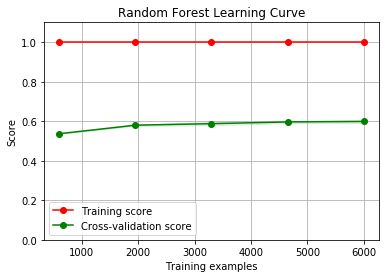

In [30]:
plot_learning_curve(rf, "Random Forest Learning Curve", X_train_vect, y_train, ylim=[0,1.1])

## Adaboost

In [31]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
clf_model = clf.fit(X_train_vect, y_train)
y_pred = clf_model.predict(X_val_vect)
y_test_pred = clf_model.predict(X_test_vect)

# Train and Test Accuracy
print ("Train Accuracy : {}".format(accuracy_score(y_train, clf_model.predict(X_train_vect))))
print ("Validation Accuracy  : {}".format(accuracy_score(y_val, y_pred)))
print ("Test Accuracy  : {}".format(accuracy_score(y_test, y_test_pred)))

Train Accuracy : 0.629
Validation Accuracy  : 0.5983333333333334
Test Accuracy  : 0.6046666666666667


/Users/alex/Desktop/NLP/NLP_Lynda_Course/env/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '/Users/alex/Desktop/NLP/NLP_Lynda_Course/env/lib/python3.7/site-packages/matplotlib/pyplot.py'>

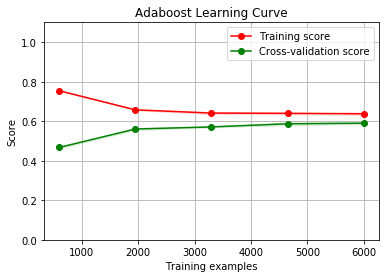

In [32]:
plot_learning_curve(clf, "Adaboost Learning Curve", X_train_vect, y_train, ylim=[0,1.1])

## SVM

In [33]:
from sklearn import svm

clf = svm.SVC()
clf_model = clf.fit(X_train_vect, y_train)
y_pred = clf_model.predict(X_val_vect)
y_test_pred = clf_model.predict(X_test_vect)

# Train and Test Accuracy
print ("Train Accuracy : {}".format(accuracy_score(y_train, clf_model.predict(X_train_vect))))
print ("Validation Accuracy  : {}".format(accuracy_score(y_val, y_pred)))
print ("Test Accuracy  : {}".format(accuracy_score(y_test, y_test_pred)))

/Users/alex/Desktop/NLP/NLP_Lynda_Course/env/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train Accuracy : 0.3371111111111111
Validation Accuracy  : 0.3283333333333333
Test Accuracy  : 0.327


/Users/alex/Desktop/NLP/NLP_Lynda_Course/env/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/alex/Desktop/NLP/NLP_Lynda_Course/env/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/alex/Desktop/NLP/NLP_Lynda_Course/env/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/alex/Desktop/NLP/NLP_Lynda_Course/en

<module 'matplotlib.pyplot' from '/Users/alex/Desktop/NLP/NLP_Lynda_Course/env/lib/python3.7/site-packages/matplotlib/pyplot.py'>

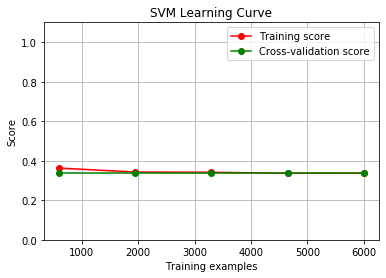

In [34]:
plot_learning_curve(clf, "SVM Learning Curve", X_train_vect, y_train, ylim=[0,1.1])

## KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf_model = clf.fit(X_train_vect, y_train)
y_pred = clf_model.predict(X_val_vect)
y_test_pred = clf_model.predict(X_test_vect)

# Train and Test Accuracy
print ("Train Accuracy : {}".format(accuracy_score(y_train, clf_model.predict(X_train_vect))))
print ("Validation Accuracy  : {}".format(accuracy_score(y_val, y_pred)))
print ("Test Accuracy  : {}".format(accuracy_score(y_test, y_test_pred)))

Train Accuracy : 0.637
Validation Accuracy  : 0.5163333333333333
Test Accuracy  : 0.5323333333333333


/Users/alex/Desktop/NLP/NLP_Lynda_Course/env/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '/Users/alex/Desktop/NLP/NLP_Lynda_Course/env/lib/python3.7/site-packages/matplotlib/pyplot.py'>

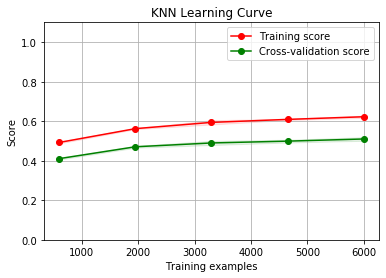

In [36]:
plot_learning_curve(clf, "KNN Learning Curve", X_train_vect, y_train, ylim=[0,1.1])

## Deep Neural Networks 

In [37]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras import layers
from tensorflow.python.keras.layers import Embedding
from tensorflow.python.keras.layers import LSTM

batch_size = 128
epochs = 12

input_dim = X_train_vect.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(128, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='softmax'))

model.compile(loss='binary_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               256128    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 256,257
Trainable params: 256,257
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.fit(X_train_vect, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val_vect, y_val))
score = model.evaluate(X_test_vect, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 9000 samples, validate on 3000 samples
Epoch 1/12
9000/9000 [==============================] - 0s 34us/sample - loss: 15.3571 - accuracy: 0.3307 - val_loss: 15.3690 - val_accuracy: 0.3347
Epoch 2/12
9000/9000 [==============================] - 0s 22us/sample - loss: 15.3571 - accuracy: 0.3307 - val_loss: 15.3690 - val_accuracy: 0.3347
Epoch 3/12
9000/9000 [==============================] - 0s 23us/sample - loss: 15.3571 - accuracy: 0.3307 - val_loss: 15.3690 - val_accuracy: 0.3347
Epoch 4/12
9000/9000 [==============================] - 0s 22us/sample - loss: 15.3571 - accuracy: 0.3307 - val_loss: 15.3690 - val_accuracy: 0.3347
Epoch 5/12
9000/9000 [==============================] - 0s 23us/sample - loss: 15.3571 - accuracy: 0.3307 - val_loss: 15.3690 - val_accuracy: 0.3347
Epoch 6/12
9000/9000 [==============================] - 0s 24us/sample - loss: 15.3571 - accuracy: 0.3307 - val_loss: 15.3690 - val_accuracy: 0.3347
Epoch 7/12
9000/9000 [==============================] - 0s

In [46]:
x = ["Fiscal 2019 was a year of transition for Walt Disney (NYSE:DIS). For one thing, Disney completed its acquisition of Twenty-First Century Fox around the middle of the fiscal year. The company also spent much of the year preparing for a shift in its business model toward a greater emphasis on direct-to-consumer entertainment -- particularly the Disney+ streaming service, which will launch in just a few days.These two developments have weighed on results in recent quarters. But the House of Mouse benefited from a strong film slate over the summer, helping it to post solid financial results in the final quarter of fiscal 2019.Earnings per share fall, but still beat expectationsDisney generated revenue of 19.1 billion last quarter -- up from $14.3 billion a year earlier -- mainly due to the Fox acquisition. Total segment operating income increased 5% to 3.4 billion, despite the company now booking Hulu's entire loss in its financial results after taking full control of the streaming service earlier this year.Outside of its segment results, Disney is experiencing severe earnings pressure, mainly from amortization expenses related to buying Fox and Hulu. Higher interest expense (from the debt it issued to fund the Fox deal), higher corporate overhead costs, and other one-time items also hurt earnings. Lastly, Disney's share count increased in conjunction with the Fox acquisition.As a result, EPS plunged 72% to 0.43 last quarter. On an adjusted basis -- excluding various one-time items -- EPS fell 28% year over year: from $1.48 to $1.07. That easily beat the average analyst estimate of 0.95. CFO Christine McCarthy also estimated that the dilution from buying Fox and Hulu reduced EPS by about $0.47. In other words, on a like-for-like basis, earnings grew for the core Disney business."]
tfidfVectorizer = joblib.load('tfidfVectorizer.pkl')

tfidf_train = tfidfVectorizer.transform(x)
x = pd.DataFrame(tfidf_train.toarray())

print(rf_model.predict(x))

[1]


In [47]:
s = '''
IRVING, Texas and DANBURY, Conn., Nov. 06, 2019 (GLOBE NEWSWIRE) -- ExxonMobil and FuelCell Energy, Inc. said today they have signed a new, two-year expanded joint-development agreement to further enhance carbonate fuel cell technology for the purpose of capturing carbon dioxide from industrial facilities.

The agreement, worth up to $60 million, will focus efforts on optimizing the core technology, overall process integration and large-scale deployment of carbon capture solutions. ExxonMobil is exploring options to conduct a pilot test of next-generation fuel cell carbon capture solution at one of its operating sites.  

“ExxonMobil is working to advance carbon capture technologies while reducing costs and enhancing scalability,” said Vijay Swarup, vice president of research and development for ExxonMobil Research and Engineering Company. “This expanded agreement with FuelCell Energy will enable further progress on this unique carbon capture solution that has the potential to achieve meaningful reductions of carbon dioxide emissions from industrial operations.”

FuelCell Energy’s proprietary technology uses carbonate fuel cells to efficiently capture and concentrate carbon dioxide streams from large industrial sources. Combustion exhaust is directed to the fuel cell, which produces power while capturing and concentrating carbon dioxide for permanent storage.

The modular design enables the technology to be deployed at a wide range of locations, which could lead to a more cost-efficient path for large-scale deployment of carbon capture and sequestration.

“Today’s announcement underscores our leadership position in fuel cell technology,” said Jason Few, president and chief executive officer of FuelCell Energy. “We are excited to continue to work with ExxonMobil to tackle one of the biggest challenges that exists today. We have a great opportunity to scale and commercialize our unique carbon capture solution, one that captures about 90 percent of carbon dioxide from various exhaust streams, while generating additional power, unlike traditional carbon capture technologies which consume significant power."

“FuelCell Energy has always been proud of our technology and our role in reshaping the environmental impact of industry and electrical generation. This is another giant step forward towards the large-scale deployment of this much needed technology.”

ExxonMobil and FuelCell Energy began working together in 2016 with a focus on better understanding the fundamental science behind carbonate fuel cells and how to increase efficiency in separating and concentrating carbon dioxide from the exhaust of natural gas-fueled power generation. The new and expanded agreement will prioritize the optimization of the core carbon capture technology for integration into large-scale industrial facilities such as refineries and chemical plants.

ExxonMobil engineers and scientists have researched, developed and applied technologies that could play a role in the widespread deployment of carbon capture and storage for more than 30 years. The company has a working interest in approximately one-fifth of the world’s total carbon capture capacity, and has captured about 7 million tonnes per year of carbon dioxide. ExxonMobil has captured more carbon dioxide than any other company.
'''

x = [s]
tfidfVectorizer = joblib.load('tfidfVectorizer.pkl')

tfidf_train = tfidfVectorizer.transform(x)
x = pd.DataFrame(tfidf_train.toarray())

print(rf_model.predict(x))

[1]


In [48]:
s = '''
WINTER HAVEN, Fla. (AP) — Authorities in central Florida say two Disney workers and a former assistant principal at a middle school were among 17 arrested in a child porn sting.

In a news release , Polk County Sheriff Grady Judd said Friday that the 17 men arrested range in age from 19 to 77.

Authorities say 52-year-old Walt Disney World Resorts janitor Donald Durr of Davenport had images of child porn on an electronic tablet.

Investigators say 40-year-old Brett Kinney of Lake Alfred told officers he had an addiction to child pornography and worked as a guest experience manager at Disney World.

In a statement, Disney says Kinney is no longer employed by the company and Durr is on unpaid leave.

It’s unclear if either has an attorney who could comment on the charges.

___

Information from: The Ledger (Lakeland, Fla.), http://www.theledger.com

The Associated Press'''

x = [s]
tfidfVectorizer = joblib.load('tfidfVectorizer.pkl')

tfidf_train = tfidfVectorizer.transform(x)
x = pd.DataFrame(tfidf_train.toarray())

print(rf_model.predict(x))

[-1]


In [51]:
s = '''
THis is just some random text I want to test
'''

x = [s]
tfidfVectorizer = joblib.load('tfidfVectorizer.pkl')

tfidf_train = tfidfVectorizer.transform(x)
x = pd.DataFrame(tfidf_train.toarray())

print(rf_model.predict(x))

[0]


In [ ]:
import pickle 

pkl_filename = "rf_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rf_model, file)